In [44]:
# Imports
from c3_lightcurve_functions import *



# To-Do

- [x] Directly port functionality from lightcurve_testing.ipynb to this notebook 
- [ ] Figure out how to manipulate pandas dataframes better - remove rows with specific values, etc
- [ ]

### Edge Cases

1. some files where the peak brightness occurs twice (maybe 190?) remove max_index[0] to find
2. some files where there is 'no data from...' at header OR footer, currently ignoring 1 line of header and footer, losing possible data
3. giga tiny filesize, index 1 only has 2 lines

In [45]:
#begin populating the dataframe that will have 
# col 1: transient name
# col 2: redshift (if exists)
# col 3: rise time
# col 4: fade time
# col 5: peak apparent magnitude
# col 6: peak absolute magnitude (converted with redshift)

#get the files
image_location = r"lightcurves\*"
filenames = sorted(glob.glob(image_location))

#create the database to be filled
transientDataFrame = pd.DataFrame(columns = ['name', 'z', 'rise time', 'fade time', 'peak apparent mag', 'peak absolute mag'])

# parse through all files, adding both possible name combinations to the dataframe
for i, filename in enumerate(filenames):
    # print(i)      #testing
    # Get the info
    name_PTF, name_iPTF = form_transient_names(filename)
    risetime, fadetime = analyze_lightcurve(filename, plot=False)
    
    # populate the DB, once for each possible name
    transientDataFrame = transientDataFrame.append({
                                                'name' : name_PTF,
                                                'z' : np.nan,
                                                'rise time' : risetime,
                                                'fade time' : fadetime,
                                                'peak apparent mag' : np.nan,
                                                'peak absolute mag' : np.nan
                                                },
                                                ignore_index=True
    )

    transientDataFrame = transientDataFrame.append({
                                                'name' : name_iPTF,
                                                'z' : np.nan,
                                                'rise time' : risetime,
                                                'fade time' : fadetime,
                                                'peak apparent mag' : np.nan,
                                                'peak absolute mag' : np.nan
                                                },
                                                ignore_index=True
    )






c:\Users\wjhoh\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\wjhoh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
# display the dataframe
print(transientDataFrame.to_string())

           name   z  rise time  fade time  peak apparent mag  peak absolute mag
0      PTF09alu NaN       7.13      17.86                NaN                NaN
1     iPTF09alu NaN       7.13      17.86                NaN                NaN
2      PTF09aus NaN      -1.00      -1.00                NaN                NaN
3     iPTF09aus NaN      -1.00      -1.00                NaN                NaN
4      PTF09bad NaN        NaN        NaN                NaN                NaN
5     iPTF09bad NaN        NaN        NaN                NaN                NaN
6       PTF09bw NaN      -1.00      -1.00                NaN                NaN
7      iPTF09bw NaN      -1.00      -1.00                NaN                NaN
8      PTF09dfk NaN      78.43      62.50                NaN                NaN
9     iPTF09dfk NaN      78.43      62.50                NaN                NaN
10     PTF09dih NaN        NaN      15.00                NaN                NaN
11    iPTF09dih NaN        NaN      15.0

In [47]:
# Finding some information about the data frame

# How many total transients did we parse?
entrycount_0 = len(transientDataFrame["name"])
print(f'The table has {entrycount_0} entries representing {int(entrycount_0/2)} files.')

# How many files were too small?
toosmall_count = len(transientDataFrame[transientDataFrame['rise time'] < 0]) / 2
print(f'There were {toosmall_count} files with too few lines of data to parse.')

# #remove the bad ones
# badnames = transientDataFrame[transientDataFrame["rise time"] < 0]["name"]
# badnames = badnames.to_numpy()

# Reduce the dataframe to only transients with rise times and fade times
transientDataFrame_edited = transientDataFrame[transientDataFrame['rise time'] > 0]
transientDataFrame_edited = transientDataFrame_edited[transientDataFrame_edited['fade time'] > 0]

entrycount_1 = len(transientDataFrame_edited["name"])
print(f'After removing the transients with insufficient data, we are left with {entrycount_1} entries representing {entrycount_1/2} files.')






The table has 898 entries representing 449 files.
There were 23.0 files with too few lines of data to parse.
After removing the transients with insufficient data, we are left with 324 entries representing 162.0 files.


In [58]:
# display the edited dataframe
print(transientDataFrame_edited.to_string())

           name   z  rise time  fade time  peak apparent mag  peak absolute mag
0      PTF09alu NaN       7.13      17.86                NaN                NaN
1     iPTF09alu NaN       7.13      17.86                NaN                NaN
8      PTF09dfk NaN      78.43      62.50                NaN                NaN
9     iPTF09dfk NaN      78.43      62.50                NaN                NaN
12     PTF09dnl NaN      15.51      18.74                NaN                NaN
13    iPTF09dnl NaN      15.51      18.74                NaN                NaN
32      PTF09fr NaN       3.35       2.18                NaN                NaN
33     iPTF09fr NaN       3.35       2.18                NaN                NaN
36     PTF09gnm NaN       6.94      27.83                NaN                NaN
37    iPTF09gnm NaN       6.94      27.83                NaN                NaN
38     PTF09gpu NaN       5.08      21.37                NaN                NaN
39    iPTF09gpu NaN       5.08      21.3

<Figure size 900x600 with 0 Axes>

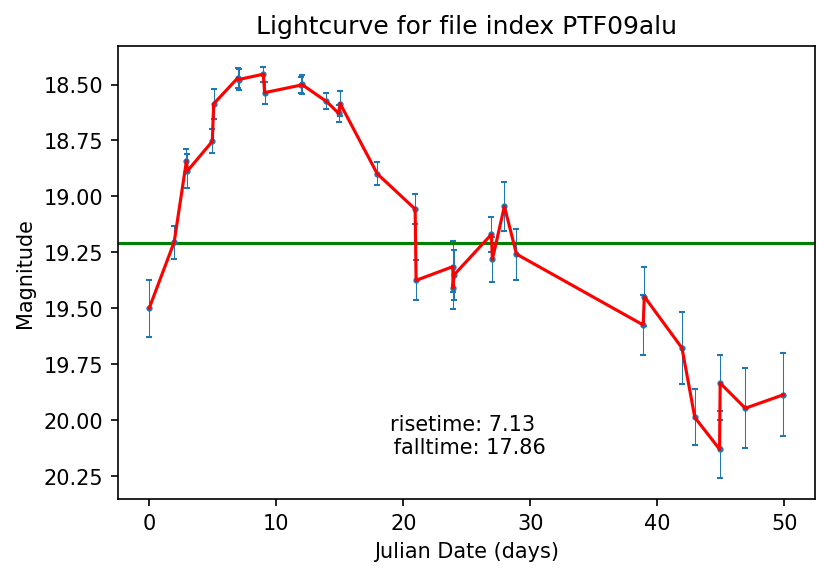

In [48]:
# Create the lightcurve for specific file indices

image_location = r"lightcurves\*"
filenames = sorted(glob.glob(image_location))

start_index = 0
end_index = 0

curr_index = start_index
for filename in filenames[start_index:end_index+1]:
    analyze_lightcurve(filename, plot=True)
    curr_index+=1


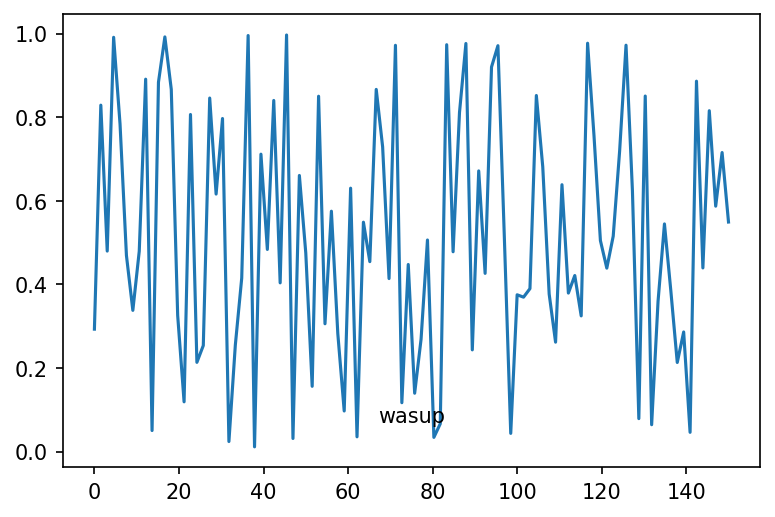

In [49]:
# testing positioning of text boxes in plt.plot

fig, ax = plt.subplots(dpi=150)

x = np.linspace(0,150, 100)
y = np.random.rand(1,100)
y = y[0,:]

plt.plot(x,y)

ax.text(.5, 0.1, "wasup", transform=ax.transAxes, ha='center')

plt.show()





In [50]:
transientDataFrame.drop(0)

,name,z,rise time,fade time,peak apparent mag,peak absolute mag
1,iPTF09alu,NaN,7.13,17.86,NaN,NaN
2,PTF09aus,NaN,-1.00,-1.00,NaN,NaN
3,iPTF09aus,NaN,-1.00,-1.00,NaN,NaN
4,PTF09bad,NaN,NaN,NaN,NaN,NaN
5,iPTF09bad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
893,iPTF17wj,NaN,NaN,2.76,NaN,NaN
894,PTF17yw,NaN,NaN,NaN,NaN,NaN
895,iPTF17yw,NaN,NaN,NaN,NaN,NaN
896,PTF17zg,NaN,-1.00,-1.00,NaN,NaN


In [51]:
badnames = transientDataFrame[transientDataFrame["rise time"] < 0]["name"]
badnames = badnames.to_numpy()

In [52]:
badnames = badnames.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

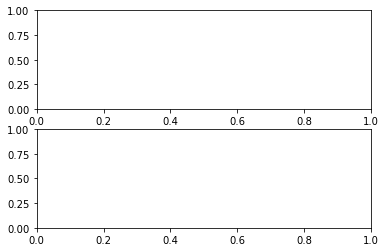

In [59]:
plt.figure()

fig1, ax1 = plt.subplot(211)



fig2, ax2 = plt.subplot(212)


plt.show()